# 图像读取
现在我们开始添加本实验的第一张图片。我们需要用到opencv的**imread()方法**加载一张由640x 480的摄像头采集到的三色卡片图像。
<!-- ![exp1](./exp_images/Tricolor.jpg)    -->

使用 **cv.imread(<文件路径>,<标志位>) 函数：** 第一个参数为图像文件路径，第二个参数为可选参数，如下所示。

标志|标志值|概述
---|---|---
cv.IMREAD_COLOR|1|加载通道顺序为BGR的彩色图像。当该参数忽略时，默认选择它。
cv.IMREAD_GRAYSCALE |0|以灰度模式加载图像
cv.IMREAD_UNCHANGED|-1|加载原始图像，包括alpha通道

分别加载图像的bgr通道和灰度图

In [1]:
import cv2 as cv
origin = cv.imread("./exp_images/Tricolor.jpg",-1)
gray = cv.imread("./exp_images/Tricolor.jpg",0)

# 窗口创建
现在我们需要创建一个窗口，在后面的图像和视频显示、绘图、图像处理都将使用到它。

In [2]:
cv.namedWindow("window",cv.WINDOW_NORMAL)
cv.resizeWindow("window",320,240)
cv.waitKey(0)
cv.destroyAllWindows()

打开窗口后需要使用cv.waiKey或cv.pollKey来执行GUI任务管理器，使窗口响应鼠标和键盘事件。否则，将不会显示。例如，waitKey(0)将无限显示窗口，直到按下任何一个键（适用于图像显示）。waitKey(25)将显示一帧并等待大约25ms的按键（适合逐帧显示视频）。要删除该窗口，请使用cv:：destroyWindow。

- **cv.namedWindow(<窗口名>,<标志位>)：** 生成一个窗口。第一个参数为唯一指定的窗口名，第二个参数为可选参数，如下所示。默认情况下，<标志位>==**WINDOW_AUTOSIZE|WINDOW_KEEPRATIO | WINDOW_GUI_EXPANDED**

    标志|标志值|概述
    ---|---|---
    cv.WINDOW_NORMAL|0X00000000|显示图像后，允许用户随意调整窗口大小。
    cv.WINDOW_AUTOSIZE|0X00000001|根据图像大小显示窗口，不允许用户调整大小。
    cv.WINDOW_FREERATIO|0X00000100|调整图像尺寸以充满窗口，不考虑其本比例
    cv.WINDOW_KEEPRATIO|0X00000000|调整图像尺寸以充满窗口，考虑其本比例
    cv.WINDOW_GUI_EXPANDED|0X00000000|创建的窗口允许添加工具栏和状态栏。
    cv.WINDOW_GUI_NORMAL|0X00000010|创建的窗口没有状态栏和工具栏窗口。
    
- **cv2.resizeWindow(<窗口名>,<宽>,<高>)：** 修改窗口尺寸

- **cv.waitkey()：** 是一个键盘绑定事件函数。参数为等待时间单位为ms，如过没有事件触发，程序将继续运行。当参数为0时，它将无限期等待键盘事件触发。也可以设定为检测特定的按键。


- **cv.destroyAllWindows()：** 会销毁创建的所有窗口，如果要销毁特定的窗口，可以使用**cv.destroyWindow()** 参数为窗口名称。


# 图像显示
**使用cv.imshow(<窗口名>,<输入图像>)：** 在窗口中显示图像，如果窗口未定义会创建一个窗口，窗口自动适应图像尺寸。第一个参数是窗口名称，它是一个字符串，第二个参数是显示对象。可以创建多个窗口，但需要使用不同的名称。

In [3]:
cv.namedWindow("window",cv.WINDOW_NORMAL)
cv.resizeWindow("window",320,240)
cv.imshow("window",origin)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow()如果窗口名是唯一指定的情况下，创建的窗口默认适应图像尺寸。

In [4]:
cv.imshow("origin",origin)
cv.waitKey(0)
cv.destroyAllWindows()

# 使用Matplotlib显示图像
显示灰度图像时显示需要设置plt.imshow()中的cmap参数为"gray"。

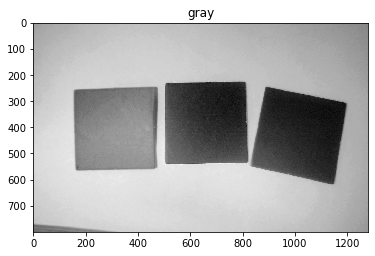

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

plt.imshow(gray,cmap='gray')
plt.title('gray')
plt.show()

我们知道OpenCV加载彩色图像处于BGR模式，但是Matplotlib加载图片以RGB显示。因此，如果使用OpenCV读取彩色图片，则在Matplotlib中将无法正确显示图片。这里我们需要将图像的颜色空间从BGR改变为RGB，具体方法将在之后说明。

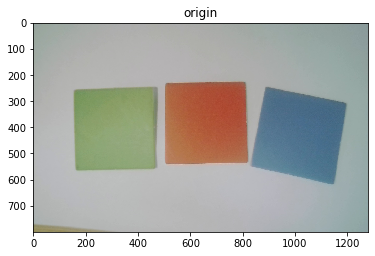

In [6]:
image = cv.cvtColor(origin, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("origin")
plt.show()

# 图像保存
**使用cv.imwrite(<输出图像文件名>,<输入图像>)** 保存图像。
第一个参数为文件名称（包括文件格式），第二个参数是保存对象。

继续使用上面的代码片段，添加一段代码段，通过监听键盘“s”键事件保存捕获帧画面。

In [7]:
cv.imwrite("./runs/Tricolor_gray.jpg", gray)

False

# 视频读取
要捕获视频，我们需要创建一个 cv.VideoCapture 对象。它的参数可以是设备号或视频文件的名称。正常情况下，连接第一个摄像头的设备号为0(或-1)。可以通过传递1来选择第二个相机，以此类推。

In [8]:
import cv2 as cv
cap = cv.VideoCapture(0)

使用VideoCapture.read()，抓取、解码并返回下一个视频帧。并输出两个参数
- returns:如果没有捕获到帧，则返回false
- image:返回视频帧此时的图像，如果没有捕捉到任何帧，则图像为None

In [9]:
ret, frame = cap.read()

需要注意的是，当完成对视频的调用后，需要使用VideoCapture.release()释放内存并清除捕获指针。

In [10]:
cv.imshow("frame",frame)
cv.waitKey(0)
cap.release()
cv.destroyAllWindows()

通常情况下，需要使用摄像头实时捕获画面。你可以逐帧捕获，并且在最后释放内存。

In [11]:
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("未找到设备")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("相机读取失败")
        break
    cv.imshow("frame",frame)
    key = cv.waitKey(1)
    if key ==27:
        break
cap.release()
cv.destroyAllWindows()

这里使用了**cv.waitKey(<延时ms>)** 获取键盘事件，退出视频采集，它的具体作用:在一个给定的时间内(单位ms)等待用户按键触发;如果用户没有按下键,则继续等待(循环)。有按键按下，返回按键的ASCII值。无按键按下，返回-1。
**需要注意的是对于某些操作系统， cv2.waitKey(1)将返回不是单字节的代码，需要通过& 0xFF取其低八位（字符的最后一个字节）**
```python
if cv2.waitKey(0) & 0xFF == 27:
```

字母和数字键的键码值(keyCode)

按键|键码|按键|键码|按键|键码|按键|键码
---|---|---|---|---|---|---|---
A|65|J|74|S|83|1|49
B|66|K|75|T|84|2|50
C|67|L|76|U|85|3|51
D|68|M|77|V|86|4|52
E|69|N|78|W|87|5|53
F|70|O|79|X|88|6|54
G|71|P|80|Y|89|7|55
H|72|Q|81|Z|90|8|56
I|73|R|82|0|48|9|57

控制键键码值(keyCode)

按键|键码|按键|键码|按键|键码|按键|键码
---|---|---|---|---|---|---|---
BackSpace|8|Esc|27|Right Arrow|39|-_|189
Tab|9|Spacebar|32|Dw Arrow|40|.>|190
Clear|12|Page Up|33|Insert|45|/?|191
Enter|13|Page Down|34|Delete|46|`~|192
Shift|16|End|35|Num Lock|144|[{|219
Control|17|Home|36|;:|186|/||220
Alt|18|Left Arrow|37|=+|187|]}|221
Cape Lock|20|Up Arrow|38|,<|188|'"|222

数字及功能键键码值(keyCode)

按键|键码|按键|键码|按键|键码|按键|键码
---|---|---|---|---|---|---|---
0|96|8|104|F1|112|F7|118
1|97|9|105|F2|113|F8|119
2|98|*|106|F3|114|F9|120
3|99|+|107|F4|115|F10|121
4|100|Enter|108|F5|116|F11|122
5|101|-|109|F6|117|F12|123
6|102|.|110| | | | 
7|103|/|111| | | | 

# 绘图函数
OpenCV绘图函数包括：cv.line()，cv.circle()，cv.rectangle()，cv.ellipse()，cv.putText()等。

在这几个函数中有以下参数是常见的，如下所示:

- img：需要绘制的图像
- color：图形的颜色。对于BGR图像，其值为元祖，例如：绿色(0,255,0)。如果是灰度的话其值为标量
- thickness：线或轮廓的厚度，如果是闭合图形（如圆），参数为-1时表示填充
- lineType：线的类型，例如八连通，抗锯齿线等。默认情况下，为8连通线。cv.LINE_AA为抗锯齿线条，适用于曲线用于曲线。

我们先用np.zeros()创建一个三通道黑色的画板。

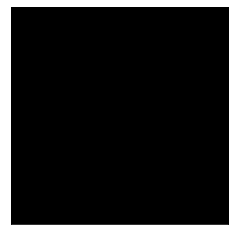

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = np.zeros((512, 512, 3), np.uint8)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 线函数
绘制一条直线，需要提供直线的开始和结束坐标，线的开始坐标为(0,0)，结束坐标为(511,511)，颜色为蓝色(255,0,0)。

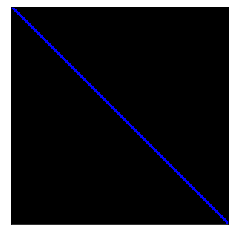

In [13]:
cv.line(img,(0, 0),(511, 511), (255, 0, 0), 5)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 矩形函数
绘制矩形，需要矩形左上角和右下角坐标(0,0)，(511,511)，颜色为绿色(0,255,0)，厚度为3。

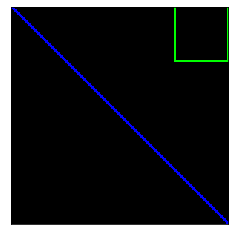

In [14]:
cv.rectangle(img, (384,0), (510, 128), (0, 255, 0), 3)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 圆函数
绘制圆形，需要圆心坐标(477,63)，半径为63，颜色为红色(0,0,255)，颜色填充(-1)。

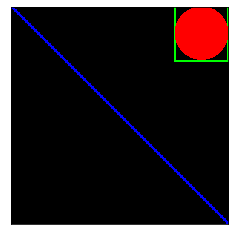

In [15]:
cv.circle(img, (447, 63), 63, (0, 0, 255), -1)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 椭圆函数
绘制椭圆需要椭圆中心位置(256,256)，轴(长轴=100，短轴=50)，后面参数为分别为椭圆沿逆时针方向旋转的角度、开始角度=0、结束角度=180，其结果为一个半椭圆。

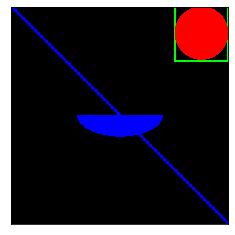

In [16]:
cv.ellipse(img,(256, 256), (100, 50),0 , 0, 180,(255, 0, 0), -1)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 多边形函数
绘制多边形，需要各个顶点的坐标。需要将这些点组成形状为：顶点数x1x2的数组，类型应为int32。这里我们绘制一个带有四个顶点的黄色多边形。

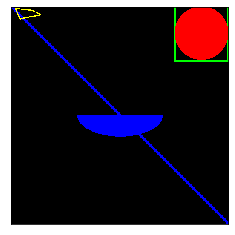

In [17]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]],np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255), 2)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

如果第三个参数为False，得到的将是一条连接所有点的折线，而不是闭合形状。

cv.ploylines()可用于绘制多条线，我们只需创建需要绘制线的列表即可。所有线将会单独绘制，与cv.line()相比，绘制一组线将是最好、最快的方法。

## 文本函数
需指定参数，图像、写入的文字内容、放置的位置（文字的左下角）、字体类型、字体比例（指定字体大小），最后就是颜色、厚度、线条类型等。这里的线条类型推荐使用cv.LINE_AA，显示效果会更好。
我们将在画板上写入“OpenCV”。

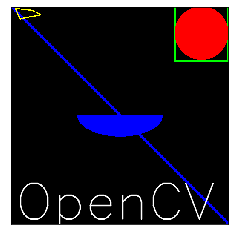

In [18]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500),font,4,(255,255,255),2,cv.LINE_AA)

# 可视化
plt.imshow(img[:, :, ::-1])
plt.xticks([]),plt.yticks([])
plt.show()

## 显示结果

In [19]:
cv.imshow("image", img)
cv.waitKey(0)
cv.destroyAllWindows()

# 鼠标事件响应
cv.setMouseCallback(<窗口名>,<回调函数>)

这里我们来创建一个简单的程序，他会在窗口上鼠标双击过的位置绘制一个
圈
。首先创建一个鼠标事件回调函数，只要**鼠标事件(event)** 发生是他就会被执行。鼠标事件可以是鼠标上的任何动作，比如左键按下，最贱松开，左键双击等。我们可以通过鼠标事件获得与鼠标对应的窗口上的**坐标**。根据这些信息我们可以做任何我们想做的事。你可以通过执行下列代码查看所有被支持的鼠标事件。壏标事件。

标志位|事件说明|标志位|事件说明
---|---|---|---
CV_EVENT_MOUSEMOVE|鼠标移动|CV_EVENT_MOUSEHWHEEL|鼠标向右（+）或向左（-）滑动|
CV_EVENT_LBUTTONDOWN|鼠标左键按下|CV_EVENT_MOUSEWHEEL|鼠标向前（+）或向后（-）滑动|
CV_EVENT_RBUTTONDOWN|鼠标右键按下|CV_EVENT_MBUTTONDBLCLK|中键双击|
CV_EVENT_MBUTTONDOWN|鼠标中键按下|CV_EVENT_RBUTTONDBLCLK|右键双击|
CV_EVENT_LBUTTONUP|鼠标左键放开|CV_EVENT_LBUTTONDBLCLK|左键双击|
CV_EVENT_RBUTTONUP|右键放开|CV_EVENT_MBUTTONUP|中键放开|

Flags主要有一下几种：

标志位|事件说明|标志位|事件说明
---|---|---|---
CV_EVENT_FLAG_LBUTTON|左键拖拽|CV_EVENT_FLAG_ALTKEY|alt按下不放
CV_EVENT_FLAG_RBUTTON|右键拖拽|CV_EVENT_FLAG_SHIFTKEY|shift按下不放
CV_EVENT_FLAG_MBUTTON|中键拖拽|CV_EVENT_FLAG_CTRLKEY|Ctrl按下不放

In [20]:
import cv2 as cv
import numpy as np

def draw_circle(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1) # 创建图像与窗口并将窗口与回䖲函数绑定

img=np.zeros((512,512,3),np.uint8)
cv.namedWindow("image")
cv.setMouseCallback("image",draw_circle)
while(1):
    cv.imshow("image",img)
    if cv.waitKey(20) == 27:
        break
cv.destroyAllWindows()

# 滑动条控件
**cv.getTrackbarPos(<滑动条名>,<窗口名>,<滑动条最小值>,<滑动条最大值>,<回调函数>)**

创建一个回调函数，内容为**pass**，使用**cv.getTrackbarPos(<滑动条名>,<窗口名>)函数**直接获取滑动条的值。运行下面代码，拉动滑动条，控制线的长度，

In [21]:
import cv2 as cv
import numpy as np

def nothing(x):
    pass

cv.namedWindow("image")
cv.createTrackbar("L", "image", 0, 511, nothing)
while(1):
    img = np.zeros((512,512,3),np.uint8)
    length = cv.getTrackbarPos("L","image")
    cv.line(img,(0, 256),(length, 256), (255, 0, 0), 10)
    cv.imshow("image", img)
    if cv.waitKey(20) == 27:
        break
cv.destroyAllWindows()